In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from jupyterthemes import jtplot
plt.style.use('mike') 
jtplot.style(context='talk', fscale=1, grid=False)

import cosmogrb

# GRBs

This section describes how to handle the low level simulation of GRBs. AS the code currently is built for simulating GRBs as observed by Fermi-GBM, we will focus our attention there. As the code expands, I will update the docs. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/1f/Fermi_telescope_illustration_01.jpg)


## Instantiate the GRB with its parameters

For this example, we will create a GRB that has its flux coming from a single pulse shape that is described by a cutoff power law evolving in time. 

$$  F_{h\nu}(t)  = K(t) \left(\frac{\nu}{\nu_0(t)} \right)^{-\alpha} \cdot \exp\left(- \frac{\nu}{\nu_0(t)} \right)$$



In [2]:
grb = cosmogrb.gbm.GBMGRB_CPL(
    ra=312.0,
    dec=-62.0,
    z=1.0,
    peak_flux=5e-7,
    alpha=-0.66,
    ep=500.0,
    tau=2.0,
    trise=1.0,
    tdecay=1.0,
    duration=80.0,
    T0=0.1,
)

grb.info()

,0
name,SynthGRB
z,1
ra,312
dec,-62
duration,80
T0,0.1


,0
peak_flux,5.000000e-07
alpha,-6.600000e-01
trise,1.000000e+00
tdecay,1.000000e+00


,0


## Examine the latent lightcurve

In [3]:
time = np.linspace(0, 20, 500)

grb.display_energy_integrated_light_curve(time, color="#A363DE");



IndexError: list index out of range

In [ ]:
energy = np.logspace(1, 3, 1000)

grb.display_energy_dependent_light_curve(time, energy, cmap='PRGn', lw=.25, alpha=.5)

## Simulate the GRB 
Now we can create all the light curves from the GRB. Since are not currently running a Dask server, we tell the GRB to process serially, i.e., computing each light curve one at a time.

In [ ]:
grb.go(serial=True)

## Save the GRB to an HDF5 file

As this is a time-consuming operation, we want to be able to save the GRB to disk. This is done by serializing all the light curves and information about the GRB into an HDF5 file.

In [ ]:
grb.save('test_grb.h5')

## Reload the GRB

What if want to reload the GRB? We need to create and instance of **GRBSave** from the file we just created. Notice all the information about the GRB is recovered.

In [5]:
grb_reload = cosmogrb.GRBSave.from_file('test_grb.h5')
grb_reload.info()

,0
name,SynthGRB
z,1
ra,312
dec,-62
duration,80
T0,0.1


,0
alpha,-6.600000e-01
peak_flux,5.000000e-07
tdecay,1.000000e+00
trise,1.000000e+00


### The GRBSave contents
The stores all the information about the light curves and the instrument responses used to generate the data. Each light curve/ response pair can be accessed as keys of the **GRBSave**. Then one can easily, examine/plot/process the contents of each light curve.


In [6]:
for key in grb_reload.keys():
    
    lightcurve = grb_reload[key]['lightcurve']
    lightcurve.info()

,0
name,b0
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76246e+08
T0,0.1
n_counts,190656
n_counts_source,36
n_counts_background,190660


,0
angle,106.678116


,0
name,b1
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76219e+08
T0,0.1
n_counts,206738
n_counts_source,70
n_counts_background,206695


,0
angle,64.599896


,0
name,n0
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76253e+08
T0,0.1
n_counts,194080
n_counts_source,136
n_counts_background,194008


,0
angle,140.423466


,0
name,n1
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76276e+08
T0,0.1
n_counts,198594
n_counts_source,127
n_counts_background,198530


,0
angle,123.192564


,0
name,n2
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76203e+08
T0,0.1
n_counts,203221
n_counts_source,87
n_counts_background,203189


,0
angle,87.337115


,0
name,n3
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76206e+08
T0,0.1
n_counts,200535
n_counts_source,108
n_counts_background,200460


,0
angle,120.135933


,0
name,n4
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76229e+08
T0,0.1
n_counts,204014
n_counts_source,89
n_counts_background,203953


,0
angle,115.423396


,0
name,n5
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76212e+08
T0,0.1
n_counts,201485
n_counts_source,47
n_counts_background,201489


,0
angle,91.866668


,0
name,n6
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76284e+08
T0,0.1
n_counts,203790
n_counts_source,121
n_counts_background,203697


,0
angle,126.89814


,0
name,n7
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76264e+08
T0,0.1
n_counts,205853
n_counts_source,142
n_counts_background,205745


,0
angle,150.685788


,0
name,n8
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76264e+08
T0,0.1
n_counts,205156
n_counts_source,127
n_counts_background,205069


,0
angle,121.106339


,0
name,n9
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76252e+08
T0,0.1
n_counts,198283
n_counts_source,85
n_counts_background,198226


,0
angle,108.143856


,0
name,na
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76287e+08
T0,0.1
n_counts,198458
n_counts_source,582
n_counts_background,197918


,0
angle,57.909913


,0
name,nb
instrument,GBM
tstart,-100
tstop,300
time adjustment,5.76277e+08
T0,0.1
n_counts,206218
n_counts_source,206
n_counts_background,206091


,0
angle,77.225671


For example, let's look at the total, source, and background data light curves generated.

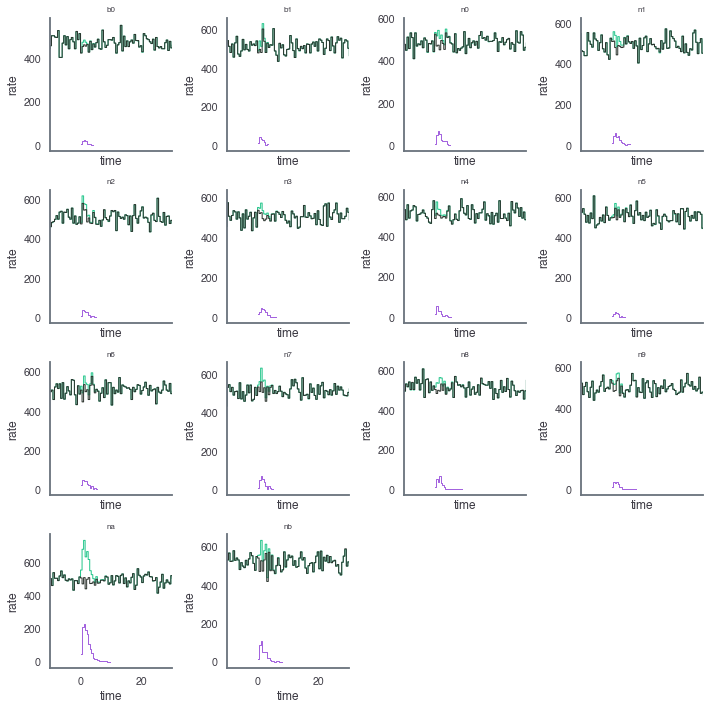

In [9]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=False,figsize=(10,10))
row=0
col = 0
for k,v  in grb_reload.items():
    ax = axes[row][col]
    
    lightcurve =v['lightcurve']
    
    lightcurve.display_lightcurve(dt=.5, ax=ax,lw=1,color='#25C68C')
    lightcurve.display_source(dt=.5,ax=ax,lw=1,color="#A363DE")
    lightcurve.display_background(dt=.5,ax=ax,lw=1, color="#2C342E")
    ax.set_xlim(-10, 30)
    ax.set_title(k,size=8)
    
    
    
    if col < 3:
        col+=1
    else:
        row+=1
        col=0

axes[3,2].set_visible(False)  
axes[3,3].set_visible(False)    
plt.tight_layout()

And we can look at the generated count spectra/

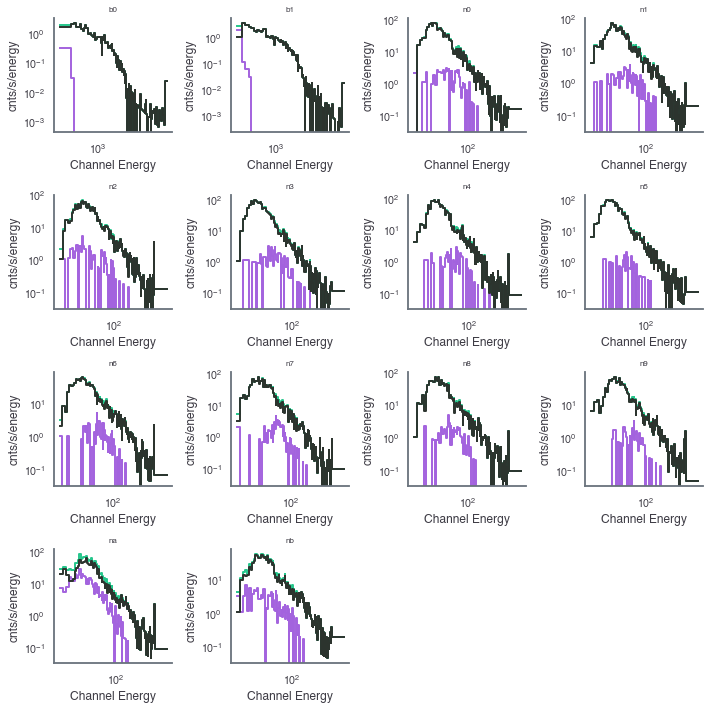

In [10]:
fig, axes = plt.subplots(4,4,sharex=False,sharey=False,figsize=(10,10))
row=0
col = 0

for k, v in grb_reload.items():
    ax = axes[row][col]
    
    lightcurve = v['lightcurve']
    
    lightcurve.display_count_spectrum(tmin=0, tmax=5, ax=ax,color='#25C68C')
    lightcurve.display_count_spectrum_source(tmin=0, tmax=5, ax=ax,color="#A363DE")
    lightcurve.display_count_spectrum_background(tmin=0, tmax=5, ax=ax, color="#2C342E")
    ax.set_title(k,size=8)
    
    if col < 3:
        col+=1
    else:
        row+=1
        col=0
        
axes[3,2].set_visible(False)  
axes[3,3].set_visible(False)  
plt.tight_layout()

## Convert HDF5 to standard FITS files

In the case of GBM, we can convert the saved HDF5 files into TTE files for analysis in 3ML.

In [12]:
cosmogrb.grbsave_to_gbm_fits("test_grb.h5")
!ls SynthGRB_*

ls: SynthGRB_*: No such file or directory
